<a href="https://colab.research.google.com/github/ram1014/colab_files/blob/main/Avance_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Métricas de Calidad de los Datos, Análisis Descriptivo y Preprocesamiento

Alumno: Ramon Humberto Delgado Andrade

Matrícula: 263165

Profesor: Vicente García Jiménez

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Mounted at /content/drive


##Introducción



###Problema
* En Estados Unidos se reportan anualmente más de 6 millones de accidentes de tráfico.

###Objetivos

* Comprender los factores que influyen en los accidentes automovilísticos podría ayudar a implementar estrategias de prevención/disminución de accidentes.

  * Analizar factores climáticos presentes en accidentes viales.
  * Analizar tipos de caminos presentes en accidentes viales.

##Acerca del conjunto de datos

Accidentes automovilísticos en Estados Unidos (2016 – 2023):
https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

Records totales: 7,728,398

Columnas: 46

No. Columna	Nombre de Columna
1.  	ID
2.  	Source
3.  	Severity
4.  	Start_Time
5.  	End_Time
6.  	Start_Lat
7.  	Start_Lng
8.  	End_Lat
9.  	End_Lng
10. 	Distance(mi)
11. 	Description
12. 	Street
13. 	City
14. 	County
15. 	State
16. 	Zipcode
17. 	Country
18. 	Timezone
19. 	Airport_Code
20. 	Weather_Timestamp
21. 	Temperature(F)
22. 	Wind_Chill(F)
23. 	Humidity(%)
24. 	Pressure(in)
25. 	Visibility(mi)
26. 	Wind_Direction
27. 	Wind_Speed(mph)
28. 	Precipitation(in)
29. 	Weather_Condition
30. 	Amenity
31. 	Bump
32. 	Crossing
33. 	Give_Way
34. 	Junction
35. 	No_Exit
36. 	Railway
37. 	Roundabout
38. 	Station
39. 	Stop
40. 	Traffic_Calming
41. 	Traffic_Signal
42. 	Turning_Loop
43. 	Sunrise_Sunset
44. 	Civil_Twilight
45. 	Nautical_Twilight
46. 	Astronomical_Twilight


##Primer limpieza de datos

Debido a que el conjunto de datos utilizado es muy grande (7 millones de registros), se escogió un subconjunto de datos dado por los accidentes que ocurrieron en el estado de Texas entre las fechas de enero de 2022 y marzo de 2023.


Para esta primera limpieza de los datos, se utilizó un programa en C para seleccionar solo los datos de interés mencionados anteriormente y crear un nuevo archivo solo con estos datos.  

El resultado fue el siguiente:
**Records totales:** 7,728,398

**Records Filtrados para Texas de 2022-2023:** 109,333


##Descripcion de los datos

In [ ]:
# Cargar las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#load dataframe
v_acc = pd.read_csv("/content/drive/MyDrive/ClassFiles/US_Accidents_March23_filter_TX_2022_2023.csv")

# Mostrar las primeras filas del DataFrame
v_acc.head(2)
print("="*100)

# Mostrar la estructura del DataFrame
print(v_acc.info())
print("="*100)
# Mostrar un resumen estadístico de las variables numéricas
print(v_acc.describe())
print("="*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109333 entries, 0 to 109332
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     109333 non-null  object 
 1   Source                 109333 non-null  object 
 2   Severity               109333 non-null  int64  
 3   Start_Time             109333 non-null  object 
 4   End_Time               109333 non-null  object 
 5   Start_Lat              109333 non-null  float64
 6   Start_Lng              109333 non-null  float64
 7   End_Lat                88033 non-null   float64
 8   End_Lng                88033 non-null   float64
 9   Distance(mi)           109333 non-null  float64
 10  Description            109333 non-null  object 
 11  Street                 108868 non-null  object 
 12  City                   109333 non-null  object 
 13  County                 109333 non-null  object 
 14  State                  109333 non-nu

##Métricas de calidad

##Revisión de valores nulos


Columnas con valores nulos:


End_Lat                  21300
End_Lng                  21300
Street                     465
Timezone                     8
Airport_Code                45
Weather_Timestamp          516
Temperature(F)             850
Wind_Chill(F)             1862
Humidity(%)                971
Pressure(in)               601
Visibility(mi)             898
Wind_Direction            1637
Wind_Speed(mph)           1637
Precipitation(in)         1738
Weather_Condition          680
Sunrise_Sunset             402
Civil_Twilight             402
Nautical_Twilight          402
Astronomical_Twilight      402
dtype: int64 




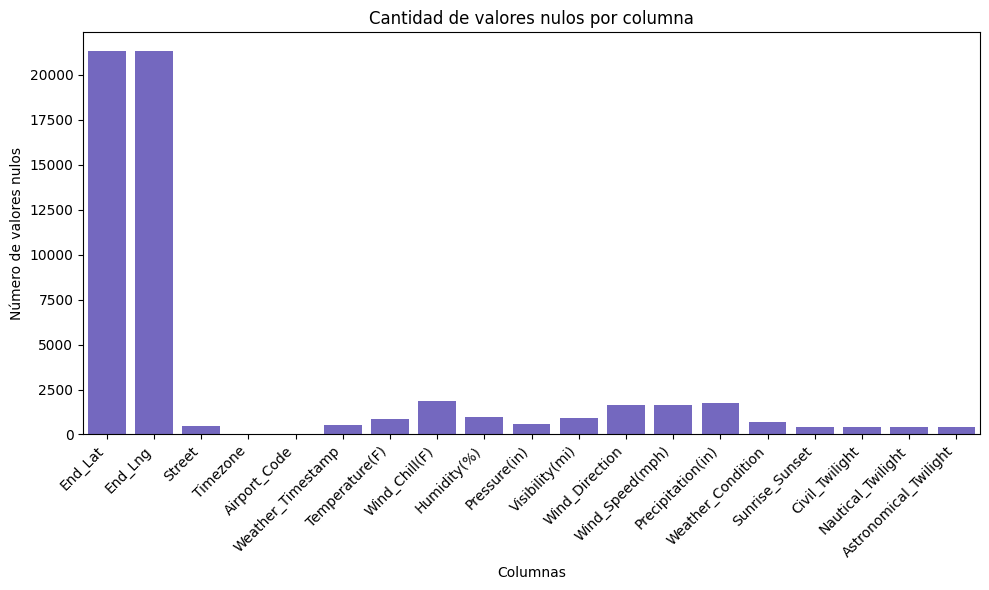

In [ ]:
columns_vs_null = v_acc.isnull().sum()
# Filtrar para mostrar solo las columnas con valores nulos
columns_with_null = columns_vs_null[columns_vs_null > 0]
print("Columnas con valores nulos:\n\n")
print(columns_with_null,"\n\n")


# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=columns_with_null.index, y=columns_with_null.values,color='slateblue')
plt.title('Cantidad de valores nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Número de valores nulos')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje X para mejor legibilidad
plt.tight_layout() # Ajustar el layout para evitar solapamientos
plt.show()

###Cambiar valores con fecha al tipo correcto

In [ ]:
print(v_acc[['Start_Time','End_Time','Weather_Timestamp']].info())
v_acc['Start_Time'] = pd.to_datetime(v_acc['Start_Time'],  format='mixed')
v_acc['End_Time'] = pd.to_datetime(v_acc['End_Time'],  format='mixed')
v_acc['Weather_Timestamp'] = pd.to_datetime(v_acc['Weather_Timestamp'],  format='mixed')
print(v_acc[['Start_Time','End_Time','Weather_Timestamp']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109333 entries, 0 to 109332
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Start_Time         109333 non-null  object
 1   End_Time           109333 non-null  object
 2   Weather_Timestamp  108817 non-null  object
dtypes: object(3)
memory usage: 2.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109333 entries, 0 to 109332
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Start_Time         109333 non-null  datetime64[ns]
 1   End_Time           109333 non-null  datetime64[ns]
 2   Weather_Timestamp  108817 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 2.5 MB
None


IndexError: index 9 is out of bounds for axis 0 with size 9

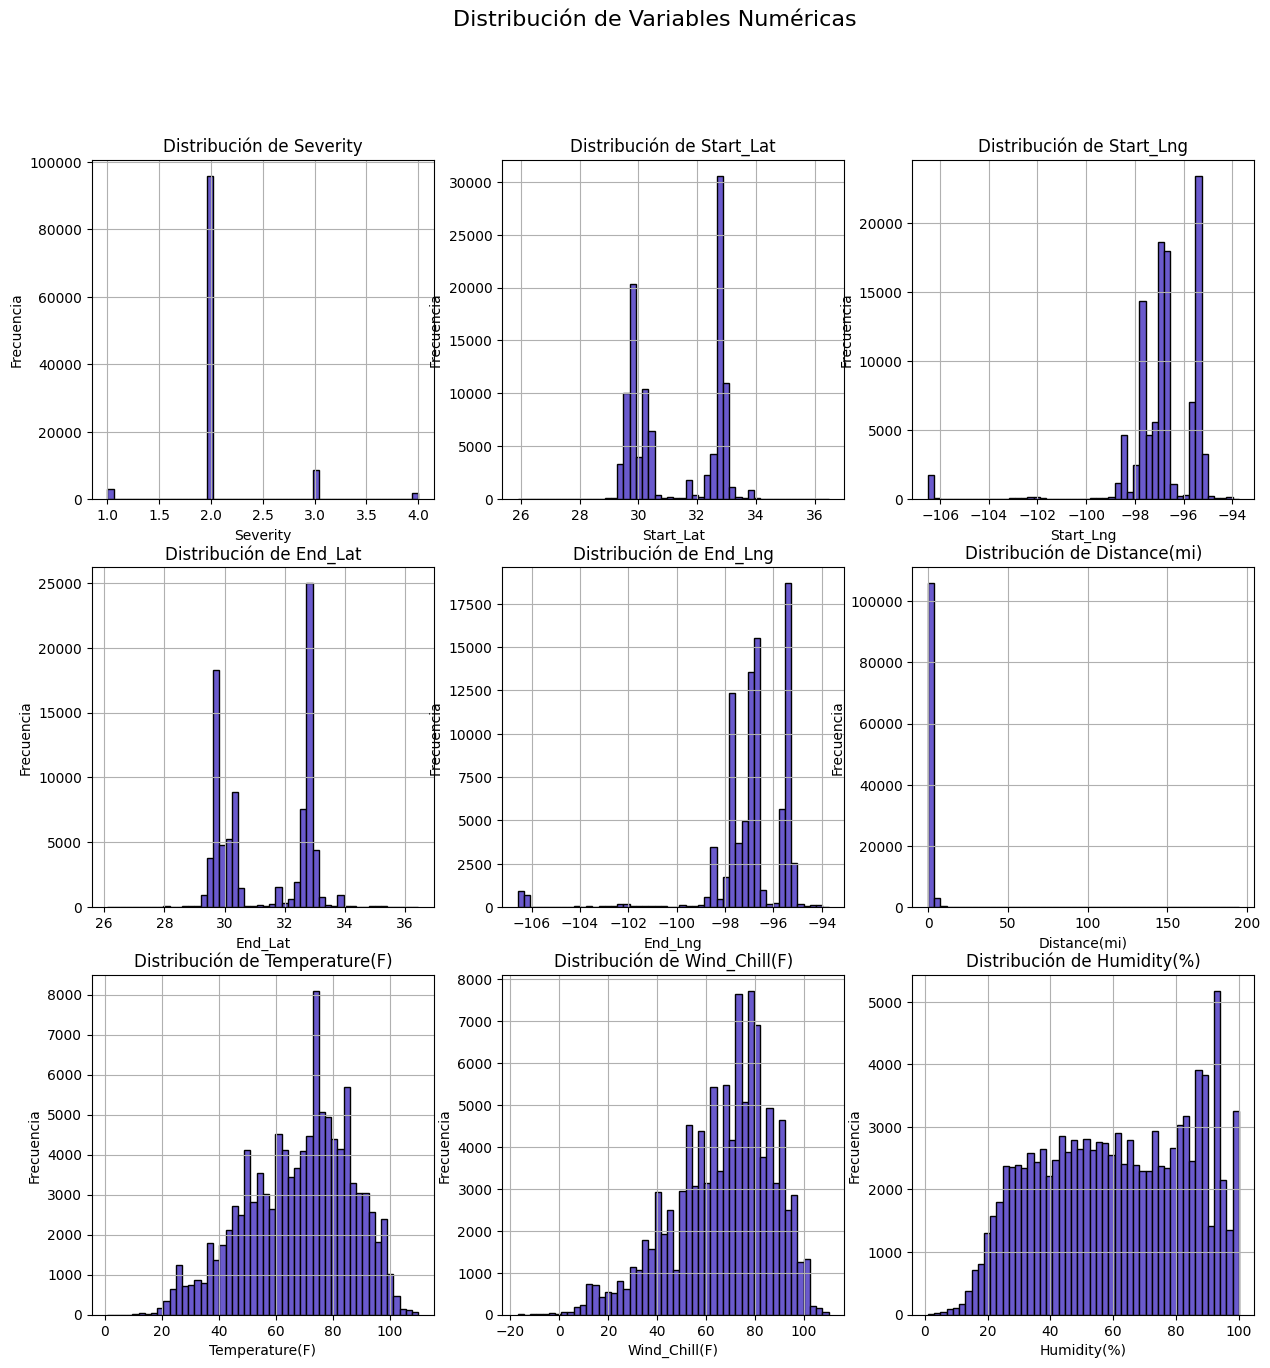

In [ ]:
# Seleccionar solo las columnas numéricas
columnas_numericas = v_acc.select_dtypes(include=[np.number]).columns

# Calcular el número de filas y columnas para el subplot
n = len(columnas_numericas)
nrows = 3
ncols = min(n, 3)

# Crear la figura y los subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5*nrows))
fig.suptitle('Distribución de Variables Numéricas', fontsize=16)

# Aplanar el array de ejes en caso de que sea 2D
axes = axes.flatten() if n > 3 else [axes]

# Crear histogramas para cada variable numérica
for i, col in enumerate(columnas_numericas):
    ax = axes[i]
    v_acc[col].hist(ax=ax, bins=50, edgecolor='black',color='slateblue')
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Ocultar subplots vacíos si los hay
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

###Frecuencia tipos de camino


In [ ]:

amenity_counts = v_acc['Amenity'].value_counts()
bump_counts = v_acc['Bump'].value_counts()
Crossing_counts = v_acc['Crossing'].value_counts()
Give_Way_counts = v_acc['Give_Way'].value_counts()
Junction_counts = v_acc['Junction'].value_counts()
No_Exit_counts = v_acc['No_Exit'].value_counts()
Railway_counts = v_acc['Railway'].value_counts()
Roundabout_counts = v_acc['Roundabout'].value_counts()
Station_counts = v_acc['Station'].value_counts()
Stop_counts = v_acc['Station'].value_counts()
Traffic_Calming_counts = v_acc['Traffic_Calming'].value_counts()
Traffic_Signal_counts = v_acc['Traffic_Signal'].value_counts()
Turning_Loop_counts = v_acc['Turning_Loop'].value_counts()

print(amenity_counts)
print(bump_counts)
print(Crossing_counts)
print(Give_Way_counts)
print(Junction_counts)
print(No_Exit_counts)
print(Railway_counts)
print(Roundabout_counts)
print(Station_counts)
print(Stop_counts)
print(Traffic_Calming_counts)
print(Traffic_Signal_counts)
print(Turning_Loop_counts)





Amenity
False    107656
True       1677
Name: count, dtype: int64
Bump
False    109293
True         40
Name: count, dtype: int64
Crossing
False    98987
True     10346
Name: count, dtype: int64
Give_Way
False    108576
True        757
Name: count, dtype: int64
Junction
False    102689
True       6644
Name: count, dtype: int64
No_Exit
False    109095
True        238
Name: count, dtype: int64
Railway
False    108399
True        934
Name: count, dtype: int64
Roundabout
False    109330
True          3
Name: count, dtype: int64
Station
False    106752
True       2581
Name: count, dtype: int64
Station
False    106752
True       2581
Name: count, dtype: int64
Traffic_Calming
False    109236
True         97
Name: count, dtype: int64
Traffic_Signal
False    92768
True     16565
Name: count, dtype: int64
Turning_Loop
False    109333
Name: count, dtype: int64


##Valores atípicos


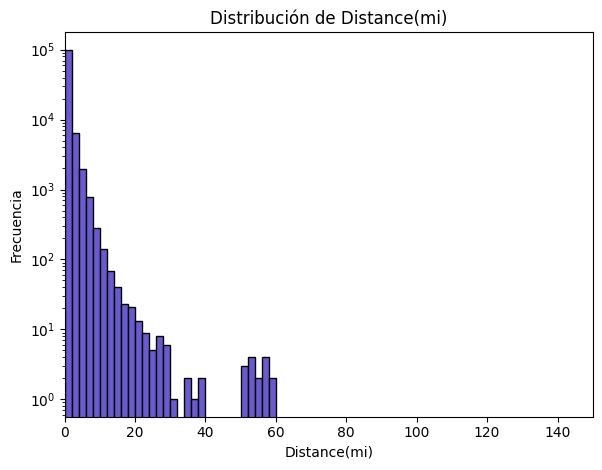

Estadísticas para O3:
Q1 - 1.5IQR = -1.06
Q1 = 0.02
Mediana = 0.13
Q3 = 0.74
Q3 + 1.5IQR = 1.83
Número de observaciones: 109333
Número de outliers: 10756


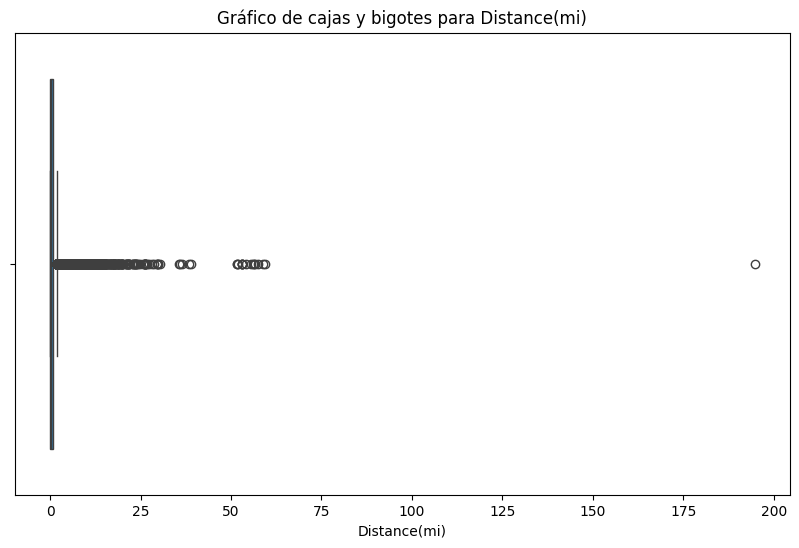

In [ ]:
plt.hist(v_acc['Distance(mi)'], bins=100, range=(0, 200), color='slateblue', edgecolor='black')
plt.title('Distribución de Distance(mi)')
plt.xlabel('Distance(mi)')
plt.ylabel('Frecuencia')
plt.xlim(0,150)
plt.tight_layout()
plt.yscale('log')
plt.show()


# Estadísticas necesarias para reproducir el gráfico de cajas y bigotes
Q1 = v_acc['Distance(mi)'].quantile(0.25)
Q3 = v_acc['Distance(mi)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Estadísticas para O3:")
print(f"Q1 - 1.5IQR = {lower_bound:.2f}")
print(f"Q1 = {Q1:.2f}")
print(f"Mediana = {v_acc['Distance(mi)'].median():.2f}")
print(f"Q3 = {Q3:.2f}")
print(f"Q3 + 1.5IQR = {upper_bound:.2f}")
print(f"Número de observaciones: {len(v_acc['Distance(mi)'])}")
print(f"Número de outliers: {sum((v_acc['Distance(mi)'] < lower_bound) | (v_acc['Distance(mi)'] > upper_bound))}")

# Construcción del gráfico de cajas y bigotes
plt.figure(figsize=(10, 6))
sns.boxplot(x=v_acc['Distance(mi)'])
plt.title('Gráfico de cajas y bigotes para Distance(mi)')
plt.xlabel('Distance(mi)')
plt.show()

###Valores categoricos


In [ ]:
print(v_acc['Source'].value_counts().head(10))
print('='*20)
print(v_acc['City'].value_counts().head(10))
print('='*20)
print(v_acc['Wind_Direction'].value_counts().head(10))
print('='*20)
print(v_acc['Timezone'].value_counts().head(10))
print('='*20)
print(v_acc['Sunrise_Sunset'].value_counts().head(10))
print('='*20)
print(v_acc['Civil_Twilight'].value_counts().head(10))
print('='*20)
print(v_acc['Nautical_Twilight'].value_counts().head(10))
print('='*20)
print(v_acc['Astronomical_Twilight'].value_counts().head(10))
print('='*20)

print(v_acc['Severity'].value_counts().head(10))
print('='*20)
print(v_acc['Description'].value_counts().head(10))
print("Valores unicos para 'Description':\n\n",v_acc['Description'].value_counts().count())
print('='*20)

Source
Source1    88033
Source2    20403
Source3      897
Name: count, dtype: int64
City
Houston        28078
Dallas         27391
Austin         13386
Fort Worth      5052
San Antonio     4626
Tyler           1908
Mesquite        1804
El Paso         1791
Irving          1365
Arlington       1314
Name: count, dtype: int64
Wind_Direction
S       16700
CALM    11997
SSE     11862
N        9518
SE       7548
NNW      5760
ESE      5451
VAR      5304
SSW      5105
E        5015
Name: count, dtype: int64
Timezone
US/Central     107357
US/Mountain      1968
Name: count, dtype: int64
Sunrise_Sunset
Day      73739
Night    35192
Name: count, dtype: int64
Civil_Twilight
Day      78790
Night    30141
Name: count, dtype: int64
Nautical_Twilight
Day      84171
Night    24760
Name: count, dtype: int64
Astronomical_Twilight
Day      88523
Night    20408
Name: count, dtype: int64
Severity
2    95890
3     8573
1     3139
4     1731
Name: count, dtype: int64
Description
Accident                      

##Conclusiones
* El dataset cuenta con muy pocos valores ausentes comparado con el número de registros.



* Para las columnas de tipo Datetime, Start_Time y End_Time contienen datos en todos los records, solo la columna Weather_Timestamp contiene valores ausentes.  

* La columna con un claro indicio de valores atípicos es "Distance(mi)".

* Con el dataset presentado se podría hacer un análisis de las condiciones climáticas con más frecuencia en los accidentes.



* Se puede analizar el tipo de camino en el que suceden los accidentes y cómo puede afectar en los accidentes de tránsito.